************
('\n Values calculated using Newtons Procedure after 20 iterations  = ', 244.22801152064642, 3.2049511041118075)
('\n Values calculated using Exponential Weibull= ', 244.26609002172444, 3.2084885007428507)
************


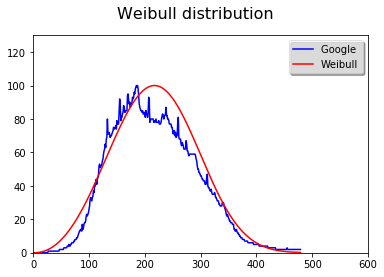

In [7]:
import numpy as np
import matplotlib.pyplot as mat
import scipy as sh
import math as ma
import scipy.stats as sh
from numpy.linalg import inv

# Class to Manange and plot the fit curve for Weibull Distribution
class Weibull:
    def __init__(self):
        data = np.genfromtxt('myspace.csv',delimiter=',')      
        GoogleData =data[:,1].astype(np.int)
        Counter = []
        
        length=len(GoogleData)
        x=np.arange(1, length+1)
        data = []
        for i in range(len(GoogleData)):
            for j in range(GoogleData[i]):
                if x[i] > 0:
                    data.append(x[i])

        self.hid = data
        self.original = GoogleData

    def NewtonWeib(self, s):
        Num = len(s)
        alpha = 1.0
        kappa = 1.0
        
        for i in range(20):
            alphaMatrix = np.array([[kappa], [alpha]])
            first = 0.0
            second = 0.0
            third = 0.0
            fourth = 0.0
            for i in range(len(s)):
                first += ma.log(s[i])
                second += (s[i] / alpha) ** kappa * ma.log(s[i] / alpha)
                third += (s[i] / alpha) ** kappa
                fourth += (s[i] / alpha) ** kappa * ma.log(s[i] / alpha, 2) ** 2
            dis1 = Num / kappa - Num * ma.log(alpha) + first - second
            dis2 = (kappa / alpha) * (third - Num)
            dis3 = (-1 * Num) / (kappa * kappa) - fourth
            dis4 = (kappa / (alpha * alpha)) * (Num - ((kappa + 1) * third))
            dis5 = (1.0 / alpha) * third + (kappa / alpha) * second - Num / alpha

            Matrix = np.matrix([[dis3, dis5], [dis5, dis4]])
            mult = inv(Matrix) * np.matrix([[-1.0 * dis1], [-1.0 * dis2]])
            alphaMatrix = alphaMatrix + mult
            kappa = alphaMatrix[0, 0]
            alpha = alphaMatrix[1, 0]
        return alpha, kappa

    # Create the data for plotting the points
    def PlotCreation(self,alpha,k):
        Original_X = []
        Original_Y = []
        for i in range(len(self.original)):
            Original_X.append(i)
            Original_Y.append(self.original[i])

        Plot1 = np.array([Original_X, Original_Y])
        Weibull_X = np.arange(1.0, len(self.original))
        Weibull_Y =[]
        for i in Weibull_X:
            Weibull_Y.append(weibull(i, alpha, k))
        #Scaling the plot
        scale = 100.0 / max(Weibull_Y)+2

        
        Plot2 = np.array([Weibull_X, np.array(Weibull_Y) * scale])
        dataPlot(Plot1, Plot2, 'WeibullFit.pdf')
        dataPlot(Plot1, Plot2)

#Function to plot the data
def dataPlot(google, original, filename=None):
   
    ##create the plot
    figure = mat.figure()
    figure.suptitle('Weibull distribution', fontsize=16)
    axes = figure.add_subplot(111)
    axes.plot(google[0, :], google[1, :], label='Google ',color='blue')
    axes.plot(original[0, :], original[1, :], label='Weibull',color='red')
    prop = axes.legend(loc='upper right', shadow=True, fancybox=True, numpoints=1)
    prop.get_frame().set_alpha(0.6)
    ##set the plot limitss
    axes.set_xlim(0, 600)
    axes.set_ylim(0, 130)

    #display the file or save it
  
    if filename == None:
        mat.show()
    else:
        mat.savefig(filename, facecolor='w', edgecolor='c',
                    papertype=None, format='pdf', transparent=False,
                    bbox_inches='tight', pad_inches=0.5)
    mat.close('all')
##Weibull    
def weibull(x, alpha, beta):
  return (beta / alpha) * ((x / alpha) ** (beta - 1)) * (ma.exp(- ((x / alpha) ** beta)))        

#Initializing Weibull class
plot = Weibull()
alpha, kappa = plot.NewtonWeib(plot.hid)
print("************")
print("\n Values calculated using Newtons Procedure after 20 iterations  = ", alpha, kappa)
Weibull_parameters = sh.exponweib.fit(plot.hid, floc=0, f0=1)
print("\n Values calculated using Exponential Weibull= ",Weibull_parameters[3],Weibull_parameters[1])
print("************")
plot.PlotCreation(alpha,kappa)